In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_text, plot_tree

In [2]:
df = pd.read_csv('heart.csv')

In [6]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0


In [4]:
df.tail()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
298,45,1,typical,110,264,0,0,132,0,1.2,2,0,reversable,1
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2,reversable,1
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1,reversable,1
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1,normal,1
302,38,1,nonanginal,138,175,0,0,173,0,0.0,1,2,normal,0


In [5]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
Target       0
dtype: int64

In [11]:
df = pd.read_csv('heart.csv') 


In [7]:
print(df.columns)


Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')


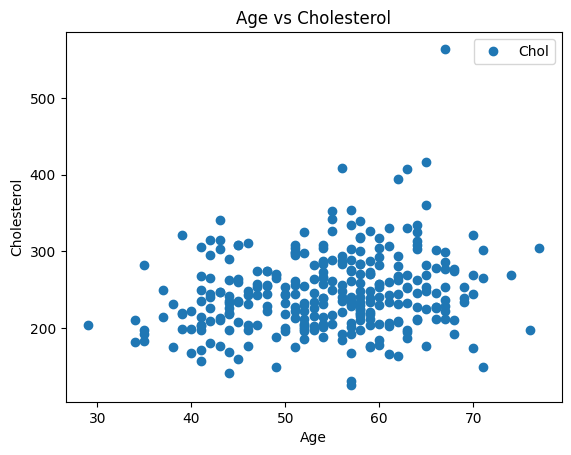

In [8]:
df.plot(x='Age', y='Chol', style='o')
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

In [10]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.686469,0.458746
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.947661,0.499120
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [11]:
df.shape

(303, 14)

In [12]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca             int64
Thal          object
Target         int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [18]:
df[df.duplicated()]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target


In [19]:
df[df.duplicated()].shape

(0, 14)

In [20]:
df1=df.drop_duplicates(keep='first')
df1.shape

(303, 14)

In [21]:
df1.dropna(how='any',inplace=True)

In [22]:
df1.shape

(301, 14)

In [23]:
df1.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.00000,301.000000
mean,54.451827,0.681063,131.714286,246.936877,0.146179,0.990033,149.700997,0.325581,1.043189,1.601329,0.69103,0.458472
std,9.067258,0.466841,17.655729,51.859869,0.353874,0.994937,22.860817,0.469372,1.163384,0.616872,0.94915,0.499102
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.00000,0.000000
50%,56.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.00000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.00000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.00000,1.000000


In [24]:
corr=df1[['Age','Sex','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca','Target']].corr()
corr

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
Age,1.000000,-0.098138,0.284734,0.208287,0.121670,0.149037,-0.395982,0.092985,0.203604,0.162228,0.331939,0.224394
Sex,-0.098138,1.000000,-0.065284,-0.202126,0.041025,0.029016,-0.057065,0.140802,0.098482,0.031571,0.100345,0.272006
RestBP,0.284734,-0.065284,1.000000,0.129371,0.178498,0.147089,-0.046402,0.065564,0.188801,0.117437,0.100535,0.151471
Chol,0.208287,-0.202126,0.129371,1.000000,0.015762,0.171185,-0.005690,0.064250,0.044836,-0.004228,0.106125,0.086762
Fbs,0.121670,0.041025,0.178498,0.015762,1.000000,0.079892,-0.012297,0.013534,0.004855,0.054079,0.164689,0.015613
RestECG,0.149037,0.029016,0.147089,0.171185,0.079892,1.000000,-0.077950,0.092626,0.117580,0.140144,0.127330,0.177049
MaxHR,-0.395982,-0.057065,-0.046402,-0.005690,-0.012297,-0.077950,1.000000,-0.386043,-0.349391,-0.393527,-0.256365,-0.425870
ExAng,0.092985,0.140802,0.065564,0.064250,0.013534,0.092626,-0.386043,1.000000,0.287926,0.254076,0.151731,0.427860
Oldpeak,0.203604,0.098482,0.188801,0.044836,0.004855,0.117580,-0.349391,0.287926,1.000000,0.576795,0.274451,0.423894
Slope,0.162228,0.031571,0.117437,-0.004228,0.054079,0.140144,-0.393527,0.254076,0.576795,1.000000,0.102041,0.335806


<Axes: >

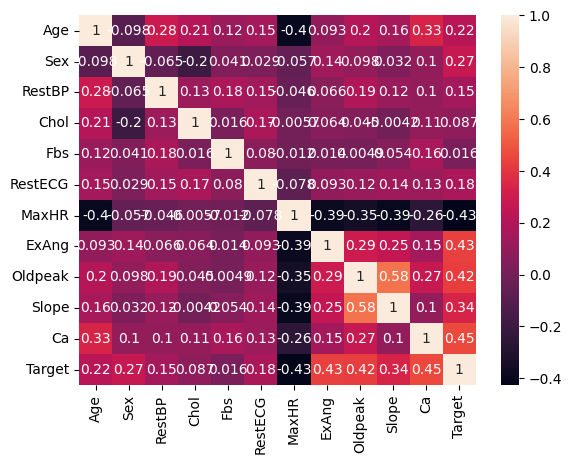

In [25]:
sns.heatmap(corr,annot=True)

In [26]:
df1['ChestPain'].value_counts()

ChestPain
asymptomatic    143
nonanginal       85
nontypical       50
typical          23
Name: count, dtype: int64

In [27]:
df1['Thal'].value_counts()

Thal
normal        166
reversable    117
fixed          18
Name: count, dtype: int64

<Axes: xlabel='ChestPain'>

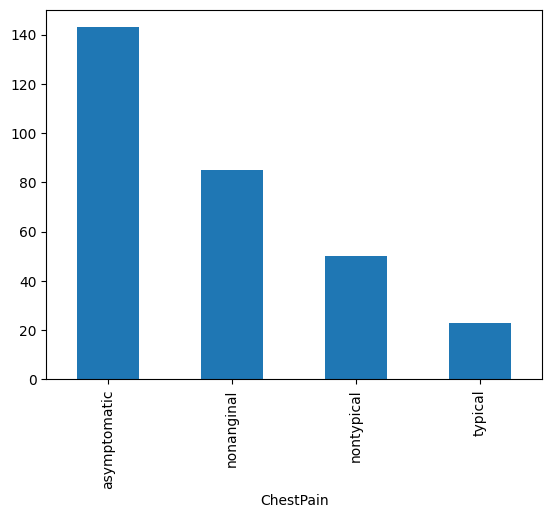

In [28]:
df1['ChestPain'].value_counts().plot(kind='bar')

In [29]:
df1['Thal'].unique()

array(['fixed', 'normal', 'reversable'], dtype=object)

<Axes: xlabel='Thal'>

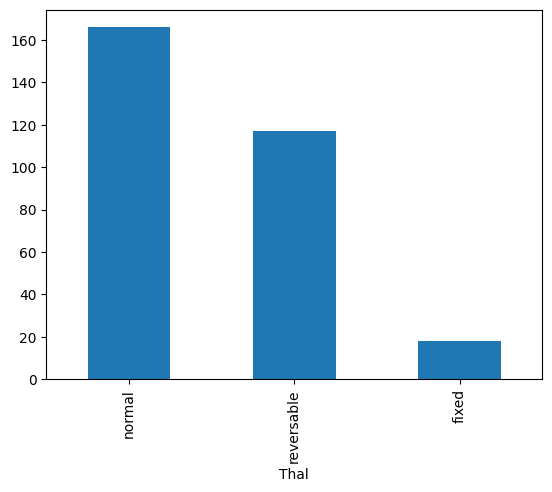

In [30]:
df1['Thal'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

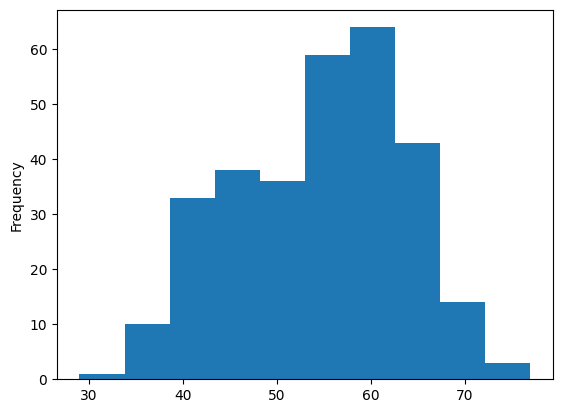

In [31]:
df1['Age'].plot(kind='hist')

<Axes: >

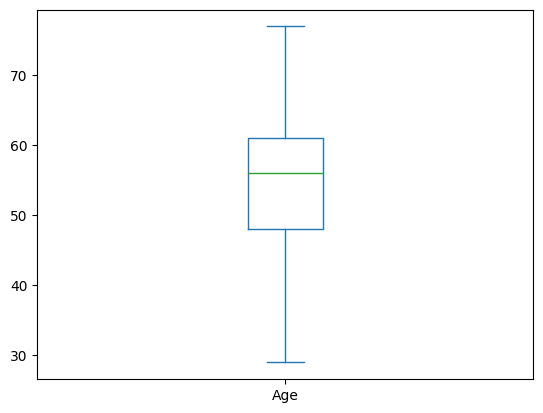

In [32]:
df1.Age.plot(kind='box')

<Axes: >

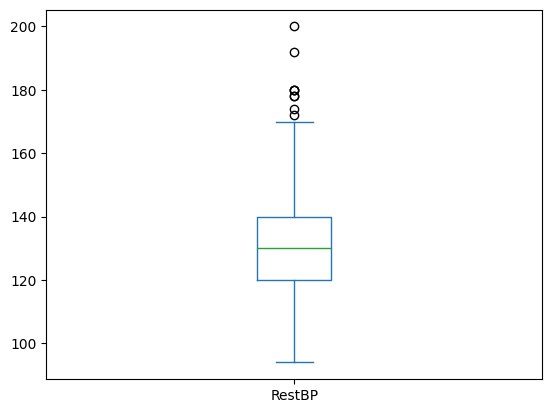

In [33]:
df1['RestBP'].plot(kind='box')

<Axes: ylabel='Frequency'>

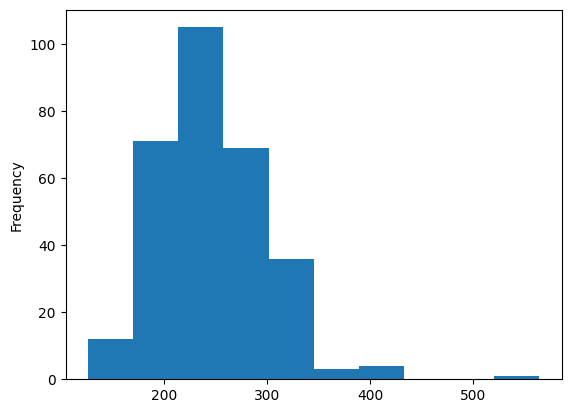

In [34]:
df1.Chol.plot(kind='hist')

In [35]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

In [36]:
x=df1[['Age','Sex','ChestPain','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal']]
y=df1['Target']

In [37]:
x.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal


In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['ChestPain', 'Thal'] 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough' 
)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [39]:
x_train.shape

(225, 13)

In [40]:
x_test.shape

(76, 13)

In [41]:
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

In [42]:
model=LinearRegression()

In [43]:
model.fit(x_train_transformed, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(x_test_transformed)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [46]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.1473668142228356
R-squared (R2) Score: 0.395461137108595


In [47]:
x_train_pred = model.predict(x_train_transformed)
x_train_pred_binary = (x_train_pred > 0.5).astype(int)
training_data_accuracy = accuracy_score(y_train, x_train_pred_binary)
print("Linear regression Training Data Accuracy:", training_data_accuracy)

Linear regression Training Data Accuracy: 0.8666666666666667


In [48]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_transformed, y_train)  

DecisionTreeClassifier()

In [49]:
# Create the decision tree classifier and training the model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)  # Set max_depth for better visualization
dt_model.fit(x_train_transformed, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [50]:
print("Feature names:", x.columns)
print("Number of features:", len(x.columns))

Feature names: Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal'],
      dtype='object')
Number of features: 13


In [51]:
# Ensure the features used for training match x.columns
print("Features used for training:", dt_model.n_features_in_)
print("Expected features:", len(x.columns))

Features used for training: 18
Expected features: 13


In [52]:
# Evaluate the model
y_pred = dt_model.predict(x_test_transformed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.80        44
           1       0.78      0.56      0.65        32

    accuracy                           0.75        76
   macro avg       0.76      0.72      0.73        76
weighted avg       0.76      0.75      0.74        76



In [53]:
print(f"Decision Tree features: {dt_model.tree_.n_features}")
print(f"Input features: {len(x.columns)}")

Decision Tree features: 18
Input features: 13


In [54]:
print(x_train.shape)
print(x_train.columns)

(225, 13)
Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal'],
      dtype='object')


In [55]:
import pandas as pd
x_train = pd.DataFrame(x_train, columns=['feature1', 'feature2', ...])

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(x_train_transformed, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Check the unique values in each column to identify categorical features
print(df.nunique())  # This will show the number of unique values in each column


Age           41
Sex            2
ChestPain      4
RestBP        50
Chol         152
Fbs            2
RestECG        3
MaxHR         91
ExAng          2
Oldpeak       40
Slope          3
Ca             4
Thal           3
Target         2
dtype: int64
